# Final Project Phase 1

#### Download the data and load it into Python
***

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load the data and print the head to get an idea of the data
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%201/Data/BreastCancerWisconsin.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1   3   1    1      2
1  1002945   5   4   4   5   7  10   3   2    1      2
2  1015425   3   1   1   1   2   2   3   1    1      2
3  1016277   6   8   8   1   3   4   3   7    1      2
4  1017023   4   1   1   3   2   1   3   1    1      2


#### Impute missing values
***

In [5]:
#Check to see if any columns contain any question marks
df.isin(['?']).any()

Scn      False
A2       False
A3       False
A4       False
A5       False
A6       False
A7        True
A8       False
A9       False
A10      False
CLASS    False
dtype: bool

In [6]:
#Update all values of ? to NaN and print how many of them were converted
A7 = df['A7'];
df['A7'] = df['A7'].replace("?", np.NaN)
df['A7'] = pd.to_numeric(df['A7'])
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")


16 of A7 is NaN.


In [7]:
#Calculate the mean and replace all NaN values with it
mean = df['A7'].mean(skipna = True)
print("The mean of column A7 is " + str(mean))


The mean of column A7 is 3.5446559297218156


In [8]:
#Replace all NaN values with the mean and print out the count to confirm they have been replaced
df = df.fillna(mean)
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")

0 of A7 is NaN.


#### Plot basic graphs 
*** 

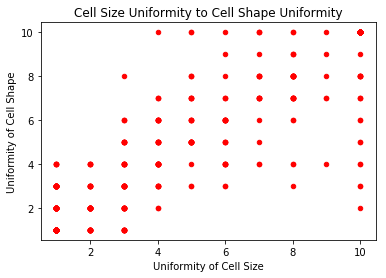

In [9]:
#Scatter plot to see relationship of cell size uniformity to cell shape uniformity

ax = df.plot(kind='scatter', x='A3', y='A4', color='red', title="Cell Size Uniformity to Cell Shape Uniformity")
ax.set_xlabel("Uniformity of Cell Size")
ax.set_ylabel("Uniformity of Cell Shape")
print()

There appears to be some correlation between cell size uniformity and cell shape uniformity based on this scatter diagram.

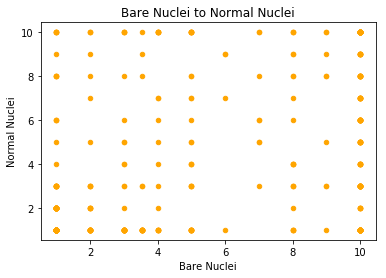

In [10]:
#Scatter plot to see relationship of bare nuclei to normal nuclei

ax = df.plot(kind='scatter', x='A7', y='A9', color='orange', title="Bare Nuclei to Normal Nuclei")
ax.set_xlabel("Bare Nuclei")
ax.set_ylabel("Normal Nuclei")
print()

In [11]:
#There is no strong correlation between the bare nuclei and normal nuclei

#### Compute data statistics
***

In [12]:
#Print out summary statistcs of the dataframe
df.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
#Print the number of rows and number of columns
num_rows, num_cols = df.shape
print("There are " + str(num_cols) + " columns and " + str(num_rows) + " rows.")

There are 11 columns and 699 rows.


In [14]:
#Report the number of unique ids
unique_count = df['Scn'].unique().size
print("There are " + str(unique_count) + " unique ids in the Scn column")

There are 645 unique ids in the Scn column


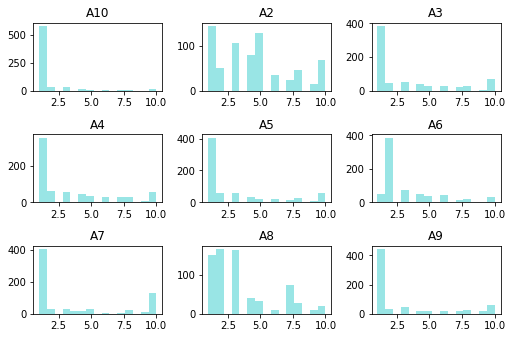

In [44]:
#Slice dataframe to include only columns A2-A10.
dfslice=df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]

#Plot 9 histograms, one for each column of dfslice: 
dfslice.hist(grid=False, bins=15, color='c', alpha=0.4)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
